# Spotify Podcast Dataset - Publisher Dendrogram



In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [68]:
df = pd.read_csv('../../podcasts-no-audio-13GB-selected/metadata.tsv', sep='\t')

## Find Shows by Publisher

In [162]:
df_pub2show = df.groupby(['publisher','show_name']).size().sort_values(ascending=False).reset_index().groupby('publisher').size().sort_values(ascending=False)
df_pub2show = pd.DataFrame(df_pub2show, columns=['Number of Shows']).reset_index()
# Calculate circle sizes based on 'Value'
#df_pub2show['CircleSize'] = np.sqrt(df_pub2show['Number of Shows'])
df_pub2show['Number of Shows Jitter'] = df_pub2show['Number of Shows'] + np.abs(np.random.normal(0,1,(len(df_pub2show),)))

## Find Episodes by Publisher

In [163]:
df_pub2episode = df.groupby('publisher').size().sort_values(ascending=False)
df_pub2episode = pd.DataFrame(df_pub2episode, columns=['Number of Episodes']).reset_index()
# Calculate circle sizes based on 'Value'
df_pub2episode['CircleSize'] = np.sqrt(df_pub2episode['Number of Episodes'])
df_pub2episode['Number of Episodes Jitter'] = df_pub2episode['Number of Episodes'] + np.random.random((len(df_pub2episode),))
df_pub2episode.shape

(17490, 4)

In [167]:
df_pub = df_pub2episode.merge(df_pub2show,on='publisher',how='left')

In [55]:
import altair as alt
import pandas as pd
import numpy as np

# Sample data (replace this with your actual data)
data = pd.DataFrame({
    'Category': ['A', 'B', 'C', 'D', 'E'],
    'Value': [30, 500, 20, 10, 404]
})

# Calculate circle sizes based on 'Value'
data['CircleSize'] = np.sqrt(data['Value'])

# Create a scatter plot with circles to represent the categorical table
circle_table = alt.Chart(data).mark_circle().encode(
    x='Category:O',
    y=alt.Y('Value:Q', title='Count'),
    size=alt.Size('CircleSize:Q', scale=alt.Scale(range=[50, 3000]), legend=None),  # Adjust size range as needed
    color=alt.Color('Category:N')
).properties(
    width=400,
    height=300,
    title='Categorical Table with Circles'
).configure_title(
    fontSize=16,
    anchor='middle'
)

circle_table

alt.Chart(...)

In [169]:
import altair as alt
import pandas as pd
import numpy as np

# Create a scatter plot with circles to represent the categorical table
circle_table = alt.Chart(df_pub.sample(5000)).mark_circle().encode(
    x=alt.X('publisher:O', axis=alt.Axis(labels=False, title='')),
    y=alt.Y('Number of Episodes Jitter:Q', scale=alt.Scale(type='log'), axis=alt.Axis(labels=False, title='')),
    size=alt.Size('CircleSize:Q', scale=alt.Scale(range=[5, 2000]), legend=None),  # Adjust size range as needed
    color=alt.Color('publisher:N', legend=None),
    #color=alt.Color(scale=alt.Scale(scheme='blueorange-8')),
    tooltip=['publisher:N', 'Number of Episodes:Q','Number of Shows:Q']  # Add a tooltip with 'Category' and 'Value'
).properties(
    width=700,
    height=700,
    title='Podcast Publishers (Hover Over)'
).configure_title(
    fontSize=16,
    anchor='middle'
).configure_axis(
    grid=False  # Remove gridlines
).configure_axisY(
    ticks=False
)

circle_table

alt.Chart(...)

In [92]:
df.columns

Index(['show_uri', 'show_name', 'show_description', 'publisher', 'language',
       'rss_link', 'episode_uri', 'episode_name', 'episode_description',
       'duration', 'show_filename_prefix', 'episode_filename_prefix'],
      dtype='object')

In [154]:
min(np.random.normal(0,1,(len(df_pub2show),)))

-3.6077622084242695

,publisher,Number of Shows,CircleSize,Number of Shows Jitter
0,AfterBuzz TV,230,15.165751,230.228869
1,Parcast Network,50,7.071068,51.682449
2,Spotify Studios,47,6.855655,47.905813
3,Gimlet,31,5.567764,32.449672
4,Seneca Learning Revision,18,4.242641,18.269041
...,...,...,...,...
17485,Grace moseler,1,1.000000,2.049894
17486,Graceful Atheist,1,1.000000,3.303831
17487,Gracefulgrace,1,1.000000,2.380220
17488,Graddy Mortalin,1,1.000000,1.230266


In [157]:
import altair as alt
import pandas as pd
import numpy as np

# Create a scatter plot with circles to represent the categorical table
circle_table = alt.Chart(df_pub2show.sample(5000)).mark_circle().encode(
    x=alt.X('publisher:O', axis=alt.Axis(labels=False, title='')),
    y=alt.Y('Number of Shows Jitter:Q', scale=alt.Scale(type='log'), axis=alt.Axis(labels=False, title='')),
    size=alt.Size('CircleSize:Q', scale=alt.Scale(range=[5, 2000]), legend=None),  # Adjust size range as needed
    color=alt.Color('publisher:N', legend=None),
    #color=alt.Color(scale=alt.Scale(scheme='blueorange-8')),
    tooltip=['publisher:N', 'Number of Shows:Q']  # Add a tooltip with 'Category' and 'Value'
).properties(
    width=700,
    height=700,
    title='Publishers (Hover over for Name)'
).configure_title(
    fontSize=16,
    anchor='middle'
).configure_axis(
    grid=False  # Remove gridlines
).configure_axisY(
    ticks=False
)

circle_table

alt.Chart(...)

In [108]:
df[df['publisher']=='David'].groupby('show_filename_prefix').size()

show_filename_prefix
show_0tdzFF8Qse4UR8pn9ReNL1    1
show_11UVF4OT5CAlvb5sZCsXu0    2
show_1avz49Hd2W7nj2XXb0SQu1    1
show_2b9g1RKvE30BKJDkkui16u    5
show_6V4blubY5N1PfwpZjKMoCI    3
show_7ndWuoDaVWUbdMdtGCr6ab    1
dtype: int64

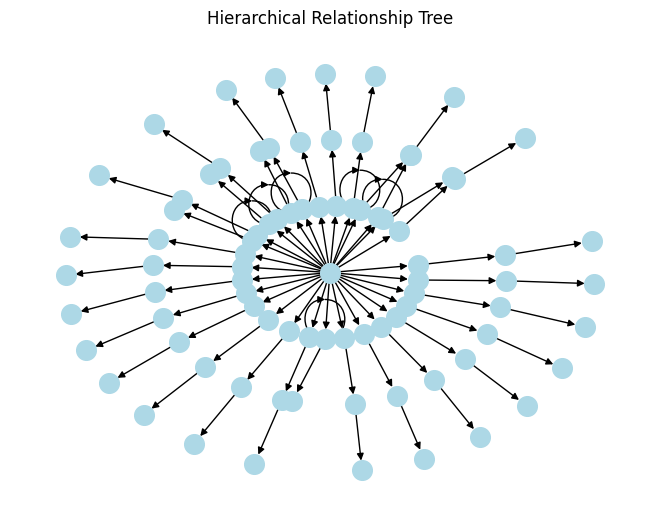

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

df2 = df.iloc[:30]

# Create a directed graph (tree) using NetworkX
G = nx.DiGraph()

# Add nodes for publisher, show, and episode
#G.add_node('Publisher')

# Add edges to represent the hierarchy
for index, row in df2.iterrows():
    G.add_edge('Podcasts', row['publisher'])
    G.add_edge(row['publisher'], row['show_name'])
    G.add_edge(row['show_name'], row['episode_name'])

# Define the layout for the tree
pos = nx.kamada_kawai_layout(G)

# Draw the tree
nx.draw(G, pos, with_labels=False, node_size=200, node_color='lightblue', font_size=10, font_weight='bold')

# Customize the plot if needed
plt.title('Hierarchical Relationship Tree')
plt.axis('off')

# Show the plot
plt.show()

In [21]:
df[['publisher','show_name']].groupby(['publisher']).value_counts()

publisher                         show_name                                                                       
 Anna Dunlop                      Tea time, with Anna Dunlop                                                          2
 Bigbabyjonathan                  Bigbabyjonathan Sports podcast show                                                 1
 Breath Work Sessions             Breath Work                                                                         3
 Cool Girls Podcast               Cool Girls Podcast                                                                  2
 Hine-Kenobi                      Wild Awake                                                                          2
                                                                                                                     ..
Élan Bridges and Kayse Whitaker   Sinister, Strange, and Suspicious                                                   8
‘Nishea                           The Cozy Ro

Other references...<br>
https://observablehq.com/@ittbt/cluster-dendrogram<br>
https://observablehq.com/@d3/zoomable-treemap<br>
